# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
import json
import scipy.stats as st
from scipy.stats import linregress
import gmaps
import os
from pprint import pprint
# Import API key
from api_keys import weather_api_key
# Range of latitudes and longitudes
lat_range = {'min': -90, 'max': 90}
lng_range = {'min': -180, 'max': 180}



## Generate Cities List

In [3]:
#list for holding latitude and longitude
lat_lngs =[]
cities = []

#create a cities randomly
lats = np.random.uniform(low =-90, high = 90, size = 2000)
lngs = np.random.uniform(low =-180, high = 180, size = 2000)
lat_lngs = zip(lats, lngs)

#indentification of unique city
for lat_lng in lat_lngs :
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities :
        cities.append(city) 
print(len(cities))  

771


In [4]:
print(cities)

['belushya guba', 'erenhot', 'port alfred', 'bluff', 'kapaa', 'nikolskoye', 'avarua', 'ribeira grande', 'armacao dos buzios', 'saleaula', 'qaanaaq', 'wulanhaote', 'castro', 'udachnyy', 'sombrio', 'maksatikha', 'attawapiskat', 'nizhniy kuranakh', 'illoqqortoormiut', 'mataura', 'rikitea', 'hermanus', 'carnarvon', 'port elizabeth', 'albany', 'hambantota', 'saskylakh', 'torbay', 'hay river', 'morristown', 'vaini', 'ushuaia', 'atuona', 'bredasdorp', 'goderich', 'hasaki', 'nishihara', 'lavrentiya', 'aklavik', 'broome', 'virginia beach', 'rosita', 'tuktoyaktuk', 'salalah', 'san cristobal', 'pacific grove', 'nanchang', 'hami', 'iqaluit', 'arraial do cabo', 'acajutla', 'valle nacional', 'ambilobe', 'busselton', 'victoria', 'stromness', 'puerto ayora', 'jiroft', 'bingol', 'panzhihua', 'jamestown', 'mys shmidta', 'beyneu', 'borogontsy', 'saint george', 'ranong', 'nanortalik', 'yar-sale', 'manggar', 'khatanga', 'isangel', 'bolgar', 'hilo', 'norman wells', 'cape town', 'mahebourg', 'kaitangata', 's

In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
response = requests.get(url + "chicago").json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 41.85, 'lon': -87.65},
 'dt': 1627916879,
 'id': 4887398,
 'main': {'feels_like': 72.63,
          'humidity': 54,
          'pressure': 1022,
          'temp': 73.08,
          'temp_max': 75.36,
          'temp_min': 69.73},
 'name': 'Chicago',
 'sys': {'country': 'US',
         'id': 2011010,
         'sunrise': 1627901140,
         'sunset': 1627952874,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 183, 'gust': 3, 'speed': 1.01}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
#units = "metric"
#params ={"q": city,"APPID":weather_api_key}


lat = []
lng = []
max_Temp = []
humidity = []
cloudiness = []
wind_Speed = []
country = []
date = []
city_2 = []
number = 0
set_one = 1
print("Beginning Data Retrieval")
print("---------------------------------------")
for city in cities : 
    try :
        response = requests.get(url + city).json() 
        #print(response)
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_Temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_Speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_2.append(response['name'])
        
        if number > 49:
            number = 1
            set_one += 1
            time.sleep(60)
        else :
            number +=1
        print(f"Processing record {number} of set: {set_one} | {city}")
    except :
        print(f"City not found. Skipping...")
        pass
print("---------------------------------------")       
print("Data Retrieval Complete")
print("---------------------------------------")       

Beginning Data Retrieval
---------------------------------------
City not found. Skipping...
Processing record 1 of set: 1 | erenhot
Processing record 2 of set: 1 | port alfred
Processing record 3 of set: 1 | bluff
Processing record 4 of set: 1 | kapaa
Processing record 5 of set: 1 | nikolskoye
Processing record 6 of set: 1 | avarua
Processing record 7 of set: 1 | ribeira grande
City not found. Skipping...
City not found. Skipping...
Processing record 8 of set: 1 | qaanaaq
City not found. Skipping...
Processing record 9 of set: 1 | castro
Processing record 10 of set: 1 | udachnyy
Processing record 11 of set: 1 | sombrio
Processing record 12 of set: 1 | maksatikha
City not found. Skipping...
Processing record 13 of set: 1 | nizhniy kuranakh
City not found. Skipping...
Processing record 14 of set: 1 | mataura
Processing record 15 of set: 1 | rikitea
Processing record 16 of set: 1 | hermanus
Processing record 17 of set: 1 | carnarvon
Processing record 18 of set: 1 | port elizabeth
Process

Processing record 32 of set: 4 | plettenberg bay
Processing record 33 of set: 4 | kabompo
Processing record 34 of set: 4 | morganton
Processing record 35 of set: 4 | piranshahr
City not found. Skipping...
Processing record 36 of set: 4 | namibe
Processing record 37 of set: 4 | tiarei
Processing record 38 of set: 4 | cururupu
Processing record 39 of set: 4 | namwala
Processing record 40 of set: 4 | tuatapere
Processing record 41 of set: 4 | marsabit
Processing record 42 of set: 4 | luang prabang
Processing record 43 of set: 4 | yulara
Processing record 44 of set: 4 | upernavik
Processing record 45 of set: 4 | faya
Processing record 46 of set: 4 | bonga
Processing record 47 of set: 4 | hithadhoo
Processing record 48 of set: 4 | san andres
Processing record 49 of set: 4 | geraldton
Processing record 50 of set: 4 | san patricio
City not found. Skipping...
Processing record 2 of set: 5 | mehamn
Processing record 3 of set: 5 | marystown
City not found. Skipping...
Processing record 4 of set:

Processing record 17 of set: 8 | northam
Processing record 18 of set: 8 | pozo colorado
Processing record 19 of set: 8 | boras
Processing record 20 of set: 8 | marienburg
Processing record 21 of set: 8 | pokhara
Processing record 22 of set: 8 | boa esperanca
Processing record 23 of set: 8 | canutama
Processing record 24 of set: 8 | noumea
Processing record 25 of set: 8 | yuci
Processing record 26 of set: 8 | barkhan
Processing record 27 of set: 8 | harper
Processing record 28 of set: 8 | el alto
Processing record 29 of set: 8 | macae
Processing record 30 of set: 8 | safaga
Processing record 31 of set: 8 | el rosario
Processing record 32 of set: 8 | kuching
Processing record 33 of set: 8 | khandyga
Processing record 34 of set: 8 | cloquet
City not found. Skipping...
Processing record 35 of set: 8 | colmenar viejo
Processing record 36 of set: 8 | oga
Processing record 37 of set: 8 | flinders
Processing record 38 of set: 8 | altay
Processing record 39 of set: 8 | kilindoni
Processing reco

Processing record 48 of set: 11 | tanah merah
Processing record 49 of set: 11 | sistranda
Processing record 50 of set: 11 | namie
City not found. Skipping...
Processing record 2 of set: 12 | turka
Processing record 3 of set: 12 | sur
City not found. Skipping...
Processing record 4 of set: 12 | lagos
Processing record 5 of set: 12 | goma
Processing record 6 of set: 12 | saint anthony
Processing record 7 of set: 12 | lokomotivnyy
City not found. Skipping...
Processing record 8 of set: 12 | aripuana
Processing record 9 of set: 12 | inhambane
Processing record 10 of set: 12 | tefe
Processing record 11 of set: 12 | puerto ayacucho
Processing record 12 of set: 12 | vieux-habitants
Processing record 13 of set: 12 | tadpatri
Processing record 14 of set: 12 | presidencia roque saenz pena
Processing record 15 of set: 12 | palmer
Processing record 16 of set: 12 | mitu
City not found. Skipping...
Processing record 17 of set: 12 | point pedro
Processing record 18 of set: 12 | kerman
Processing reco

In [7]:
#check the number of cities 
print(len(city_2))

706


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df= pd.DataFrame({"city":city_2, "Lat":lat, "Lng":lng, "Max Temp":max_Temp, 
                  "Humidity":humidity, "Cloudiness":cloudiness, 
                  "Wind Speed":wind_Speed, "Country":country, "Date":date})
df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Erenhot,43.6475,111.9767,76.14,33,100,12.33,CN,1627917571
1,Port Alfred,-33.5906,26.8910,59.13,72,88,14.43,ZA,1627917571
2,Bluff,-46.6000,168.3333,44.80,66,100,15.64,NZ,1627917572
3,Kapaa,22.0752,-159.3190,79.12,77,75,4.00,US,1627917360
4,Nikolskoye,59.7035,30.7861,62.49,97,100,10.69,RU,1627917359


In [9]:
df.to_csv("df.csv")

In [10]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,7.060000e+02
mean,19.981537,18.138136,72.875368,64.913598,53.633144,8.068031,1.627918e+09
std,32.682707,88.102484,14.014278,22.862951,40.324499,5.360707,1.588418e+02
min,-54.800000,-175.200000,32.110000,1.000000,0.000000,0.000000,1.627917e+09
25%,-6.455525,-60.399050,64.317500,52.000000,8.000000,4.075000,1.627918e+09
50%,22.745850,25.617600,74.470000,69.500000,57.500000,6.910000,1.627918e+09
75%,48.566050,91.773000,81.990000,82.000000,96.000000,11.350000,1.627918e+09
max,78.218600,179.316700,112.050000,100.000000,100.000000,32.370000,1.627918e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df.copy()

In [16]:
clean_city_data

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Erenhot,43.6475,111.9767,76.14,33,100,12.33,CN,1627917571
1,Port Alfred,-33.5906,26.8910,59.13,72,88,14.43,ZA,1627917571
2,Bluff,-46.6000,168.3333,44.80,66,100,15.64,NZ,1627917572
3,Kapaa,22.0752,-159.3190,79.12,77,75,4.00,US,1627917360
4,Nikolskoye,59.7035,30.7861,62.49,97,100,10.69,RU,1627917359
...,...,...,...,...,...,...,...,...,...
701,Hamadan,34.7992,48.5146,74.91,33,37,9.69,IR,1627917986
702,Mīrābād,30.4362,61.8383,96.26,8,0,23.98,AF,1627917986
703,Luwuk,-0.9516,122.7875,77.02,86,48,5.68,ID,1627917987
704,Novaya Tavolzhanka,50.3512,36.8298,90.82,27,8,11.99,RU,1627917987


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

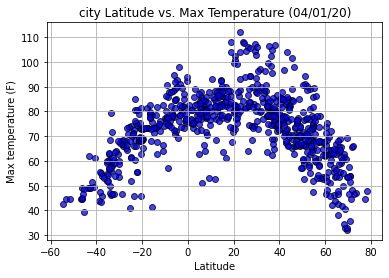

In [18]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"city Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")
plt.grid()
#plt.savefig("../output_data/lat_hum.png")
plt.show()



## Latitude vs. Humidity Plot

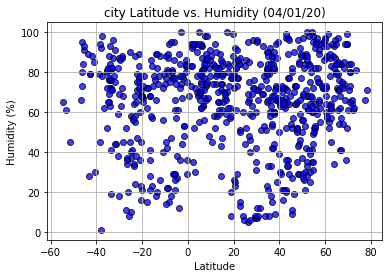

In [20]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"city Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

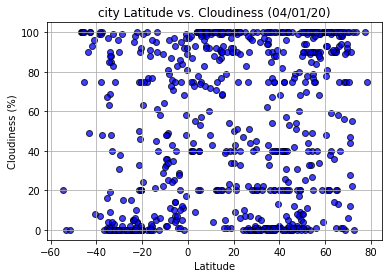

In [21]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"city Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#plt.savefig("../output_data/lat_hum.png")
plt.show()

## Latitude vs. Wind Speed Plot

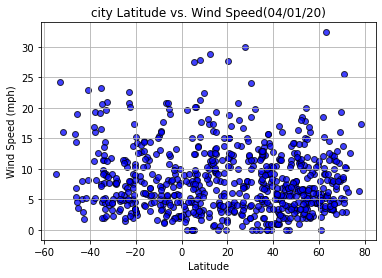

In [22]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"city Latitude vs. Wind Speed(04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#plt.savefig("../output_data/lat_hum.png")
plt.show()

## Linear Regression

In [23]:
# Create Northern and Southern Hemisphere DataFrames
equ = df['Lat'] > 0
northern_hemisphere = clean_city_data[equ]
southern_hemisphere = clean_city_data[~equ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3538964379813852


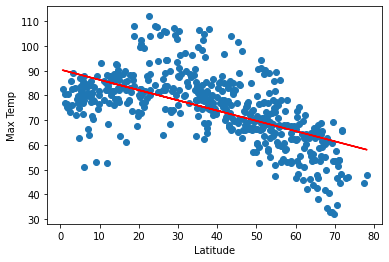

In [25]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6672144743649124


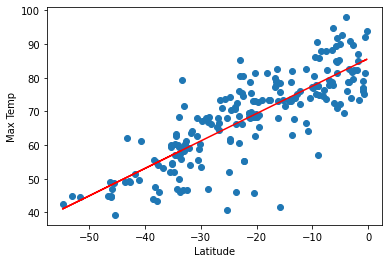

In [27]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0004931047469766411


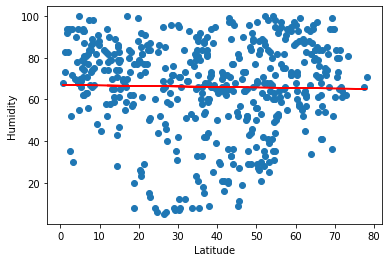

In [28]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01573042516614661


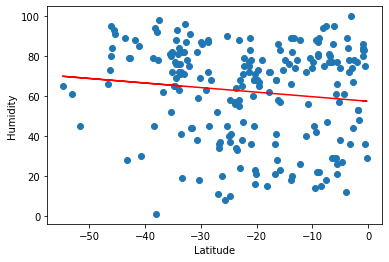

In [29]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0015113718344351816


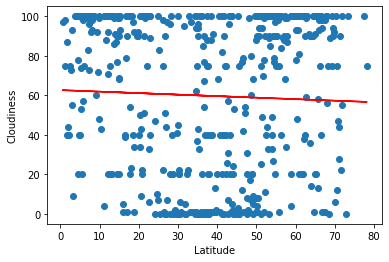

In [30]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0008881788289885197


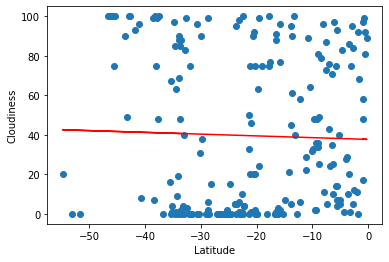

In [31]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004382788488117992


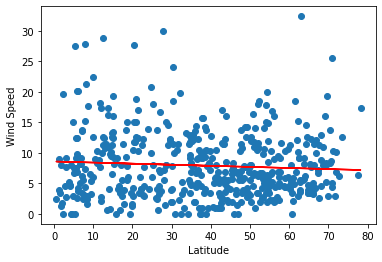

In [32]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03276021571888251


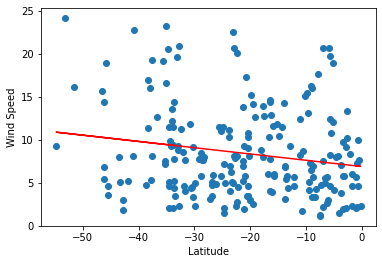

In [33]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()